Backgammon Decision Calculation

* [Around the World in 80 Games, Marcus Du Sautoy](https://www.simonyi.ox.ac.uk/books/around-the-world-in-80-games/)

* Tutor: Anthropic's AI Claude

Step-by-Step Derivation

### Initial Setup:

* You've bet y dollars
* If you refuse a double, you forfeit and lose y dollars (payout = -y)
* If you accept, you continue with probability p of winning


### Expected Payout Analysis:

When you accept a double, two scenarios can occur:

* Scenario 1: You win with probability p/(1-p), payout = 2y
* Scenario 2: You lose with probability 1-[p/(1-p)], payout = -2y


### Expected Value Calculation:

* Expected payout = (probability of scenario 1 × payout of scenario 1) + (probability of scenario 2 × payout of scenario 2)
* E[payout] = [p/(1-p)] × 2y + [1-p/(1-p)] × (-2y)


### Break-Even Analysis:

* You should accept the double when E[payout] > -y (the payout for refusing)
* This gives us the equation: -y = 2y[p/(1-p)] - 2y[1-p/(1-p)]


### Solving for Critical Value p:

* Rearranging: p - 1 = 2p - 2(1-p) + 2p
* Simplifying: p - 1 = 2p - 2 + 2p + 2p
* Further: p - 1 = 6p - 2
* Therefore: -1 + 2 = 6p - p
* So: 1 = 5p
* Thus: p = 1/5 = 0.2 = 20%


### Conclusion:

* Accept a double if you believe your winning probability exceeds 20%
* Offer a double (when you have the cube) if your winning probability exceeds 80%

p (Win Probability) | p/(1-p) (Ratio) | Expected Value (2y×p/(1-p) - 2y×(1-p/(1-p))) | Decision
-------------------|-----------------|-------------------------------------------|----------
0.10               | 0.111           | -1.556y                                   | Refuse Double
0.15               | 0.176           | -1.294y                                   | Refuse Double
0.20               | 0.250           | -1.000y                                   | Break-Even
0.25               | 0.333           | -0.667y                                   | Accept Double
0.30               | 0.429           | -0.286y                                   | Accept Double
0.40               | 0.667           | 0.667y                                    | Accept Double
0.50               | 1.000           | 2.000y                                    | Accept Double
0.60               | 1.500           | 4.000y                                    | Accept Double
0.70               | 2.333           | 6.667y                                    | Accept Double
0.80               | 4.000           | 12.000y                                   | Accept & Consider Doubling
0.90               | 9.000           | 30.000y                                   | Offer Double


Backgammon Doubling Decision Table:

    p (Win Probability)  p/(1-p) (Ratio)  Expected Value (normalized)  \
0                  0.05            0.053                       -1.789   
1                  0.10            0.111                       -1.556   
2                  0.15            0.176                       -1.294   
3                  0.20            0.250                       -1.000   
4                  0.25            0.333                       -0.667   
5                  0.30            0.429                       -0.286   
6                  0.35            0.538                        0.154   
7                  0.40            0.667                        0.667   
8                  0.45            0.818                        1.273   
9                  0.50            1.000                        2.000   
10                 0.55            1.222                        2.889   
11                 0.60            1.500                        4.000   
12           

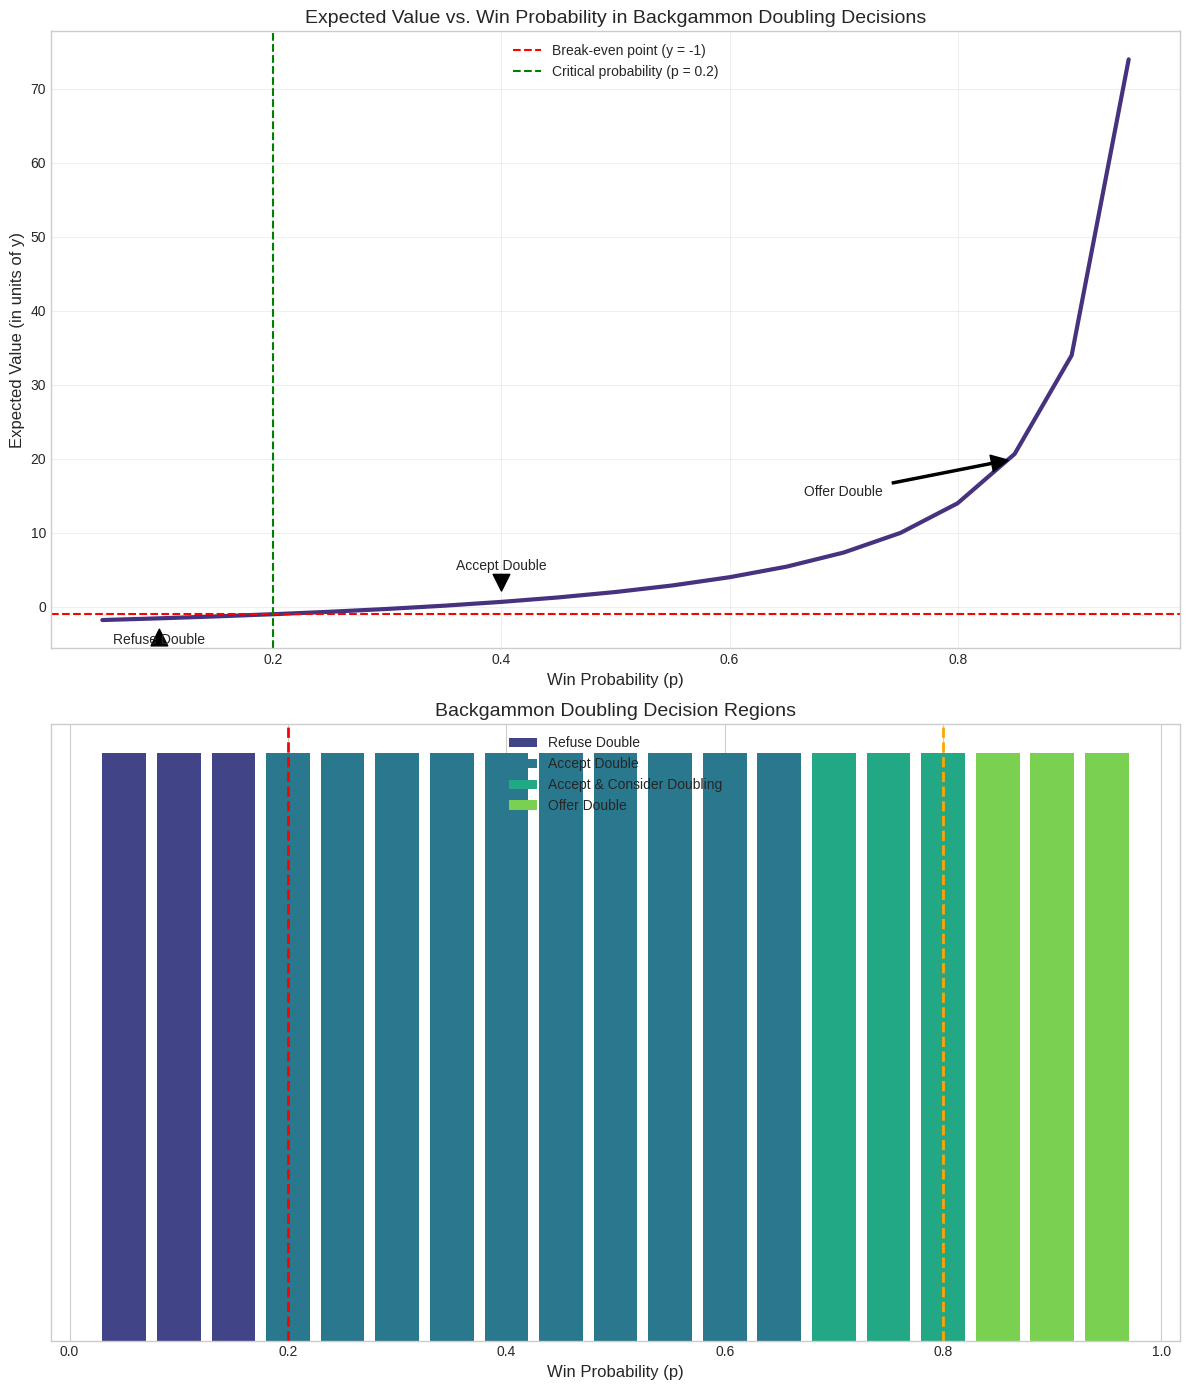


Table data can be copied directly for use in a spreadsheet.

Formula breakdown:
- p = Win probability
- p/(1-p) = Odds ratio
- Expected Value = 2y×[p/(1-p)] - 2y×[1-p/(1-p)]
- Break-even threshold: p = 1/5 = 0.2
- Decision rule: Accept double if p > 0.2, Offer double if p > 0.8


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up more appealing visual style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Define the range of probability values to analyze
p_values = np.arange(0.05, 0.96, 0.05)

# Calculate the derived values
data = []
for p in p_values:
    p_ratio = p / (1 - p)
    expected_value = 2 * p_ratio - 2 * (1 - p_ratio)  # Normalized by y

    # Determine the optimal decision
    if p < 0.2:
        decision = "Refuse Double"
    elif p > 0.8:
        decision = "Offer Double"
    elif p >= 0.7:
        decision = "Accept & Consider Doubling"
    else:
        decision = "Accept Double"

    data.append([p, p_ratio, expected_value, decision])

# Create a DataFrame for better display
df = pd.DataFrame(data, columns=['p (Win Probability)', 'p/(1-p) (Ratio)', 'Expected Value (normalized)', 'Decision'])

# Print the table
print("\nBackgammon Doubling Decision Table:\n")
pd.set_option('display.precision', 3)
print(df)

# Create visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

# Plot 1: Expected value as a function of win probability
sns.lineplot(x='p (Win Probability)', y='Expected Value (normalized)', data=df, ax=ax1, linewidth=3)
ax1.axhline(y=-1, color='red', linestyle='--', label='Break-even point (y = -1)')
ax1.axvline(x=0.2, color='green', linestyle='--', label='Critical probability (p = 0.2)')
ax1.set_title('Expected Value vs. Win Probability in Backgammon Doubling Decisions', fontsize=14)
ax1.set_xlabel('Win Probability (p)', fontsize=12)
ax1.set_ylabel('Expected Value (in units of y)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add text annotations for key points
ax1.annotate('Refuse Double', xy=(0.1, -3), xytext=(0.1, -5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             ha='center', fontsize=10)

ax1.annotate('Accept Double', xy=(0.4, 2), xytext=(0.4, 5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             ha='center', fontsize=10)

ax1.annotate('Offer Double', xy=(0.85, 20), xytext=(0.7, 15),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             ha='center', fontsize=10)

# Plot 2: Decision regions as a function of win probability
# Create a categorical color map for decisions
decision_categories = df['Decision'].unique()
color_map = dict(zip(decision_categories, sns.color_palette('viridis', len(decision_categories))))
colors = [color_map[decision] for decision in df['Decision']]

# Bar chart showing decision regions
bars = ax2.bar(df['p (Win Probability)'], [1] * len(df), width=0.04, color=colors)
ax2.set_title('Backgammon Doubling Decision Regions', fontsize=14)
ax2.set_xlabel('Win Probability (p)', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax2.set_yticks([])
ax2.axvline(x=0.2, color='red', linestyle='--', linewidth=2, label='p = 0.2 (Critical threshold)')
ax2.axvline(x=0.8, color='orange', linestyle='--', linewidth=2, label='p = 0.8 (Consider offering double)')

# Create a custom legend for the decision regions
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[decision], label=decision)
                  for decision in decision_categories]
ax2.legend(handles=legend_elements, loc='upper center', fontsize=10)

plt.tight_layout()
plt.show()

# Export to CSV (optional)
df.to_csv('backgammon_doubling_decisions.csv', index=False)

print("\nTable data can be copied directly for use in a spreadsheet.")
print("\nFormula breakdown:")
print("- p = Win probability")
print("- p/(1-p) = Odds ratio")
print("- Expected Value = 2y×[p/(1-p)] - 2y×[1-p/(1-p)]")
print("- Break-even threshold: p = 1/5 = 0.2")
print("- Decision rule: Accept double if p > 0.2, Offer double if p > 0.8")